### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data ingestion

In [2]:
df = pd.read_csv("C:\\Users\\Rajesh Singh\\Downloads\\household_power_consumption\\household_power_consumption.txt",sep=';', header =0, low_memory = False)

In [10]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


### EDA

In [4]:
df.shape

(2075259, 9)

In [5]:
## selecting 30000 sample data

df1= df.sample(30000)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 966160 to 1440870
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   30000 non-null  object 
 1   Time                   30000 non-null  object 
 2   Global_active_power    30000 non-null  object 
 3   Global_reactive_power  30000 non-null  object 
 4   Voltage                30000 non-null  object 
 5   Global_intensity       30000 non-null  object 
 6   Sub_metering_1         30000 non-null  object 
 7   Sub_metering_2         30000 non-null  object 
 8   Sub_metering_3         29642 non-null  float64
dtypes: float64(1), object(8)
memory usage: 2.3+ MB


In [9]:
df1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
966160,17/10/2008,16:04:00,0.378,0.096,240.520,1.600,0.000,1.000,1.0
159167,6/4/2007,06:11:00,0.378,0.098,242.440,1.600,0.000,0.000,0.0
663306,21/3/2008,08:30:00,1.674,0.072,238.530,7.000,0.000,0.000,18.0
124278,13/3/2007,00:42:00,0.320,0.090,241.780,1.400,0.000,2.000,0.0
187644,26/4/2007,00:48:00,0.278,0.210,236.780,1.400,0.000,1.000,0.0


In [11]:
## copy of the dataset

dff = df1.copy(deep= True)

In [12]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 966160 to 1440870
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   30000 non-null  object 
 1   Time                   30000 non-null  object 
 2   Global_active_power    30000 non-null  object 
 3   Global_reactive_power  30000 non-null  object 
 4   Voltage                30000 non-null  object 
 5   Global_intensity       30000 non-null  object 
 6   Sub_metering_1         30000 non-null  object 
 7   Sub_metering_2         30000 non-null  object 
 8   Sub_metering_3         29642 non-null  float64
dtypes: float64(1), object(8)
memory usage: 2.3+ MB


#### replacing special characters from data

In [14]:
dff.replace('?',np.nan, inplace =True)
dff.replace(',',np.nan, inplace =True)
dff.replace(' ', np.nan, inplace =True)

#### Converting the datatypes

In [15]:
dff['Global_active_power']= dff['Global_active_power'].astype(float)
dff['Global_reactive_power']= dff['Global_reactive_power'].astype(float)
dff['Voltage']= dff['Voltage'].astype(float)
dff['Global_intensity']= dff['Global_intensity'].astype(float)
dff['Sub_metering_1']= dff['Sub_metering_1'].astype(float)
dff['Sub_metering_2']= dff['Sub_metering_2'].astype(float)

#### Creating total metering column

In [16]:
dff['total_metering']= dff['Sub_metering_1']+dff['Sub_metering_2']+dff['Sub_metering_3']

#### Dropping columns not necessary

In [17]:
dff.drop(columns=['Date','Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'],inplace = True)

In [18]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 966160 to 1440870
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    29642 non-null  float64
 1   Global_reactive_power  29642 non-null  float64
 2   Voltage                29642 non-null  float64
 3   Global_intensity       29642 non-null  float64
 4   total_metering         29642 non-null  float64
dtypes: float64(5)
memory usage: 1.4 MB


In [19]:
dff.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,total_metering
count,29642.000000,29642.000000,29642.000000,29642.000000,29642.000000
mean,1.090017,0.123680,240.851523,4.621436,8.855307
std,1.052745,0.112846,3.242793,4.424501,12.736187
min,0.078000,0.000000,225.110000,0.200000,0.000000
25%,0.308000,0.048000,239.000000,1.400000,0.000000
50%,0.610000,0.100000,241.020000,2.600000,1.000000
75%,1.525500,0.194000,242.910000,6.400000,18.000000
max,10.074000,1.046000,252.430000,43.400000,128.000000


In [21]:
dff.duplicated().sum()

420

### Handling null values

In [22]:
dff['Global_active_power'] = dff['Global_active_power'].fillna(dff['Global_active_power'].median())
dff['Global_reactive_power'] = dff['Global_reactive_power'].fillna(dff['Global_reactive_power'].median())
dff['Voltage'] = dff['Voltage'].fillna(dff['Voltage'].mean())
dff['Global_intensity'] = dff['Global_intensity'].fillna(dff['Global_intensity'].median())
dff['total_metering'] = dff['total_metering'].fillna(dff['total_metering'].median())

In [23]:
dff.reset_index(inplace =True)

In [25]:
dff.drop(['index'],axis=1,inplace =True)

In [26]:
dff.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,total_metering
0,0.378,0.096,240.52,1.6,2.0
1,0.378,0.098,242.44,1.6,0.0
2,1.674,0.072,238.53,7.0,18.0
3,0.320,0.090,241.78,1.4,2.0
4,0.278,0.210,236.78,1.4,1.0


###### Checking outliers

<AxesSubplot:>

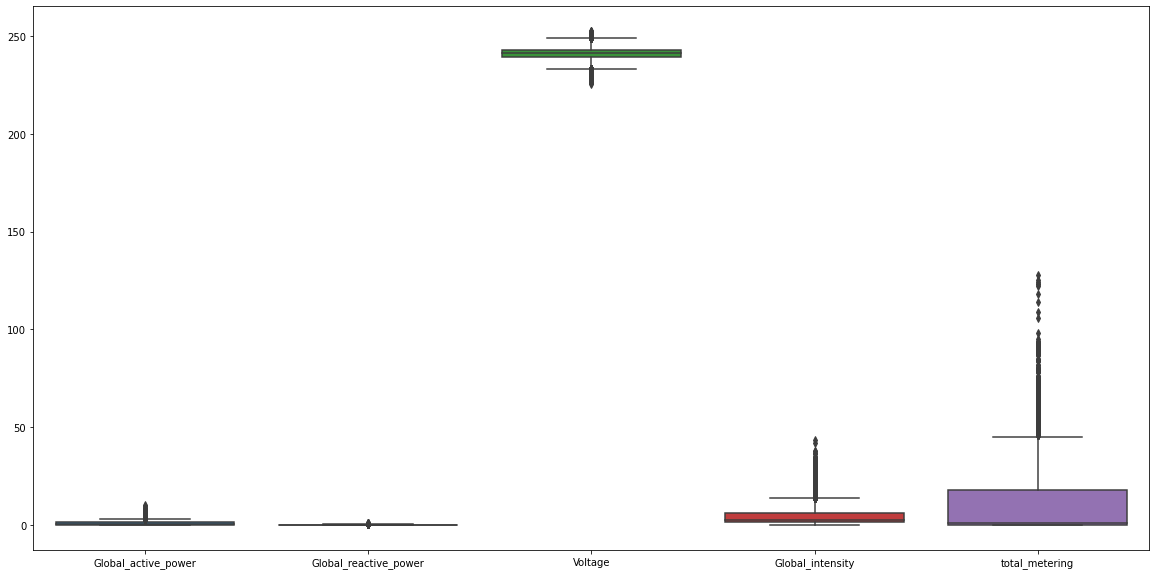

In [33]:
plt.figure(figsize =(20,10))
sns.boxplot( data =dff, fliersize=5)

###### But no need to handle as decisison tree is robust to outliers

#### Checking correlation

In [27]:
dff.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,total_metering
Global_active_power,1.000000,0.250918,-0.396464,0.998868,0.846910
Global_reactive_power,0.250918,1.000000,-0.112689,0.270415,0.181394
Voltage,-0.396464,-0.112689,1.000000,-0.407909,-0.338633
Global_intensity,0.998868,0.270415,-0.407909,1.000000,0.843715
total_metering,0.846910,0.181394,-0.338633,0.843715,1.000000


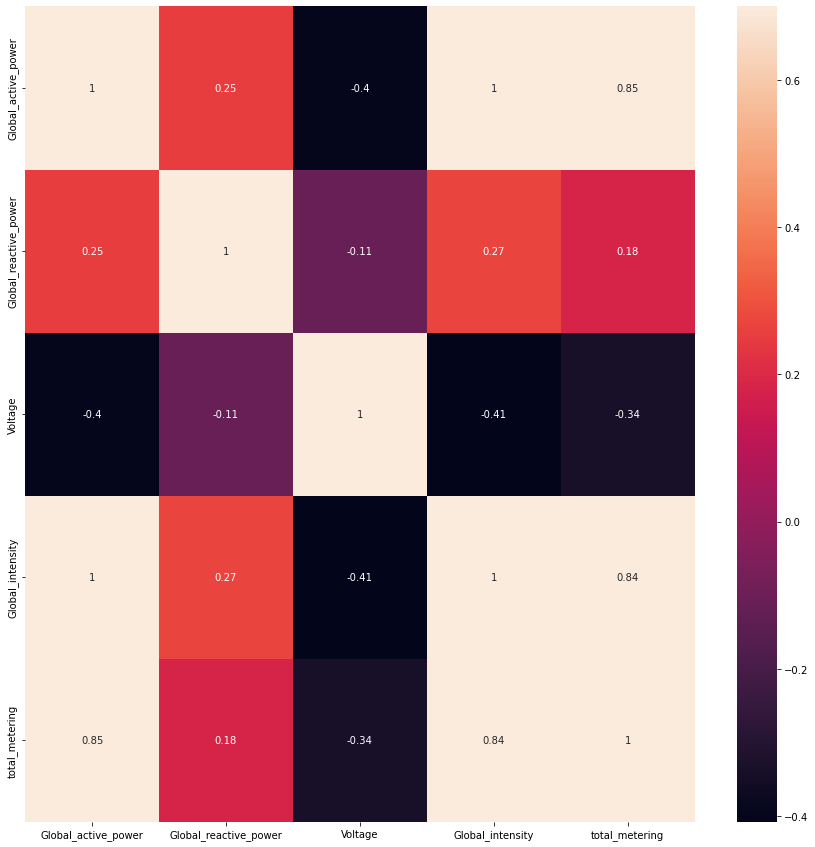

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(data=dff.corr(), annot=True,vmax=.7)   ##vmax will point out those bars with correlation greater than 0.7

###### Observation:
Global_active_power and global_intensity are highly correlated with total metering

###### multi collinearity will not be a problem in prediction using decision trees.

### Segregating the data into independent and dependent features

In [35]:
X = dff.drop(['total_metering'],axis=1)

In [37]:
y = dff['total_metering']

### Spliiting the data into train data and test data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

### Model building

In [42]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

In [43]:
# create a regressor object
regressor = DecisionTreeRegressor()

In [44]:
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor()

In [45]:
regressor.score(X_train, y_train)

0.9999955592229882

In [46]:
y_predict = regressor.predict(X_test)

#### Performance matrices

###### R Square and Adjusted R Square values

In [49]:
from sklearn.metrics import r2_score

In [54]:
r2_score_lr= r2_score(y_test, y_predict)
print("Decision tree Regression model has {} % accuracy".format(round(r2_score_lr*100,3)))

adjr2_score_lr=1-((1-r2_score_lr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("It's Adjusted R square accuracy is {} percent".format(round(adjr2_score_lr*100,2)))

Decision tree Regression model has 99.956 % accuracy
It's Adjusted R square accuracy is 99.96 percent


###### Hyper parameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_param ={
    'criterion':["squared_error"],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [58]:
grid_search= GridSearchCV(estimator=regressor,param_grid=grid_param, cv=5)

In [59]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [60]:
grid_search.best_params_ 

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 6,
 'splitter': 'random'}

In [61]:
## now we going to form the model with that best parameter

model_with_best_para= DecisionTreeRegressor(criterion= 'squared_error',
 max_depth = 10,
 min_samples_leaf= 8,
 min_samples_split= 6,
 splitter= 'random') 

In [62]:
## train the model

model_with_best_para.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=6,
                      splitter='random')

In [63]:
model_with_best_para.score(X_train,y_train)

0.7745277822652652

In [64]:
y_pred2=model_with_best_para.predict(X_test)

In [66]:
#### Performance matrices

In [65]:
r2_score_lr= r2_score(y_test, y_pred2)
print("Decision tree Regression model has {} % accuracy".format(round(r2_score_lr*100,3)))

adjr2_score_lr=1-((1-r2_score_lr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("It's Adjusted R square accuracy is {} percent".format(round(adjr2_score_lr*100,2)))

Decision tree Regression model has 76.451 % accuracy
It's Adjusted R square accuracy is 76.44 percent


###### plotting the decision tree

[Text(0.6577851220275344, 0.9545454545454546, 'X[3] <= 3.673\nsquared_error = 162.447\nsamples = 20100\nvalue = 8.811'),
 Text(0.42171855444305384, 0.8636363636363636, 'X[3] <= 3.557\nsquared_error = 1.654\nsamples = 11038\nvalue = 0.882'),
 Text(0.31402534418022526, 0.7727272727272727, 'X[0] <= 0.524\nsquared_error = 1.333\nsamples = 10887\nvalue = 0.848'),
 Text(0.1891426783479349, 0.6818181818181818, 'X[1] <= 0.061\nsquared_error = 0.738\nsamples = 9390\nvalue = 0.751'),
 Text(0.10935544430538173, 0.5909090909090909, 'X[0] <= 0.318\nsquared_error = 0.331\nsamples = 3220\nvalue = 0.398'),
 Text(0.060075093867334166, 0.5, 'X[0] <= 0.224\nsquared_error = 0.255\nsamples = 2649\nvalue = 0.362'),
 Text(0.03128911138923655, 0.4090909090909091, 'X[3] <= 0.706\nsquared_error = 0.219\nsamples = 1427\nvalue = 0.316'),
 Text(0.016270337922403004, 0.3181818181818182, 'X[0] <= 0.139\nsquared_error = 0.246\nsamples = 678\nvalue = 0.434'),
 Text(0.010012515644555695, 0.22727272727272727, 'X[3] <= 0

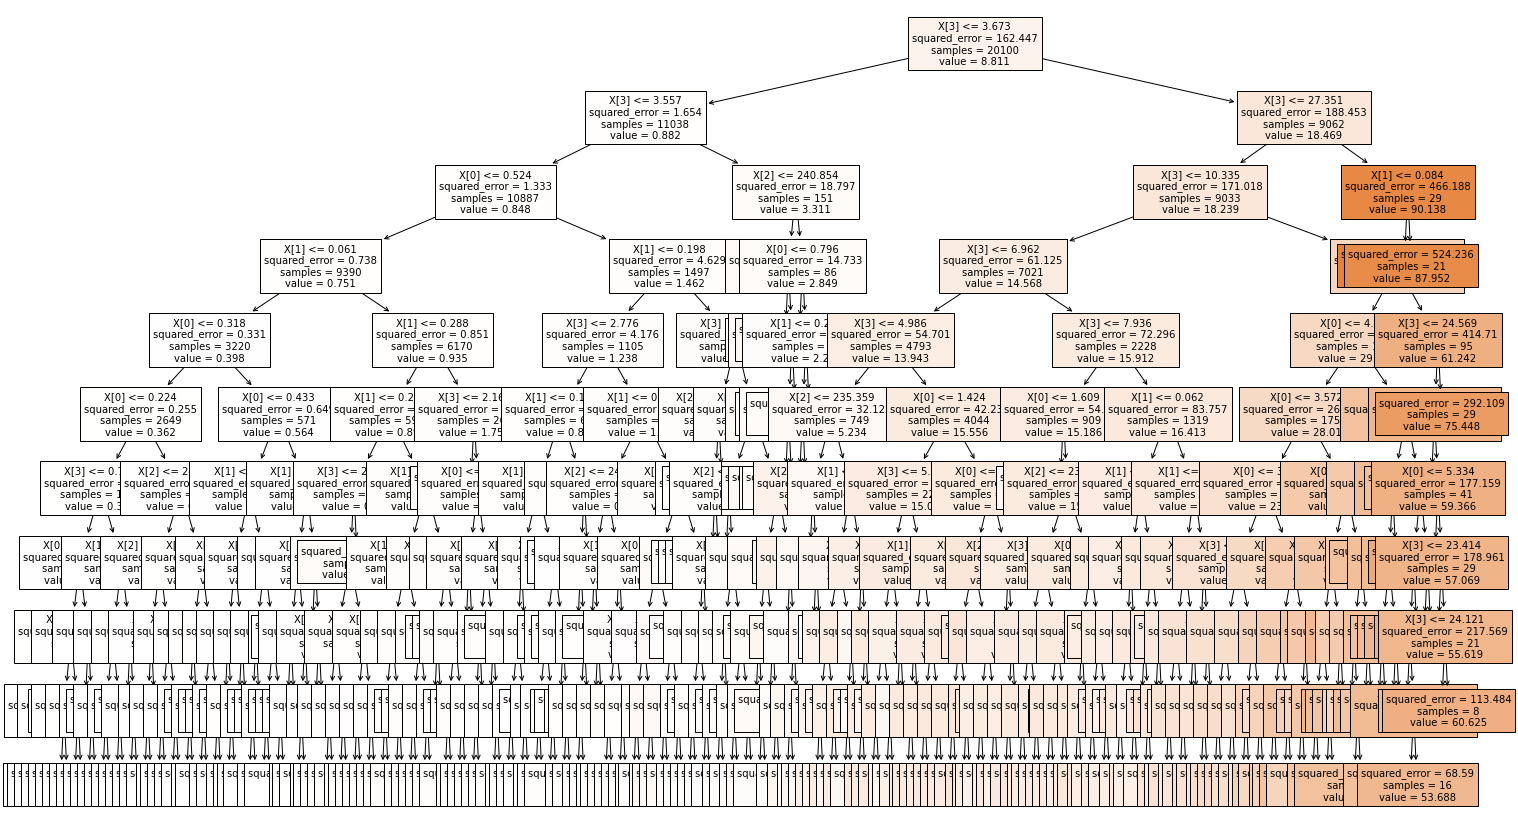

In [67]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_para,filled=True,fontsize=10)

In [ ]:
## to save this tree

fig.savefig("decistion_tree_classifier.png")